# Linear Regression

Linear regression is a simple method used to find the best straight line that describes the relationship between a dependent variable (the one you're trying to predict) and one or more independent variables (the ones you're using to make the prediction). It works by finding the line that minimizes the sum of the squared differences between the actual values and the values predicted by the line. This line can then be used to predict the dependent variable for new values of the independent variables.

## Python Implementation of Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [28]:
np.random.seed(42)

X = np.random.rand(50, 1) * 100

Y = 3.5 * X + np.random.randn(50, 1) * 20

print(X.shape)
print(Y.shape)

(50, 1)
(50, 1)


In [19]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [23]:
Y_pred = model.predict(X)

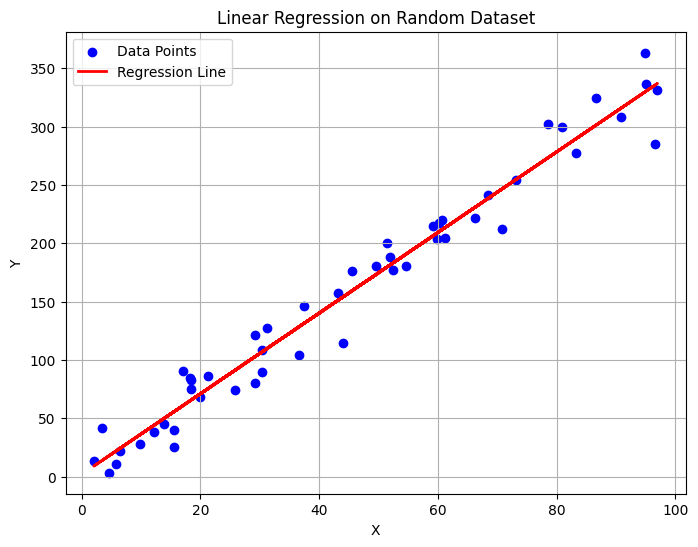

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression on Random Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Slope (Coefficient):", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

##Explaination

This code is a classic example of generating a **synthetic dataset** for a linear regression problem. It creates a set of points that follow a general straight-line trend but includes some "noise" to make it look like real-world data.

Here is the breakdown of each line:

### 1. `np.random.seed(42)`

This line ensures **reproducibility**.

* Computers generate "pseudo-random" numbers based on a starting point called a seed.
* By setting the seed to `42` (or any integer), you ensure that every time you run this code, you get the **exact same random numbers**. This is helpful for debugging or sharing results with others.

### 2. `X = np.random.rand(50, 1) * 100`

This creates your **input feature** (the independent variable).

* `np.random.rand(50, 1)`: Generates a 50x1 column vector of random numbers between **0 and 1**.
* `* 100`: Scales those numbers so they fall between **0 and 100**.
* **Result:** 50 data points representing something like "Square Footage" or "Hours Studied."

### 3. `Y = 3.5 * X + np.random.randn(50, 1) * 20`

This creates your **target variable** (the label) using a linear equation: .

* **`3.5 * X`**: This is the "true" underlying relationship. For every 1 unit increase in ,  should increase by 3.5.
* **`np.random.randn(50, 1) * 20`**: This adds **Gaussian (Normal) noise**.
* `randn` generates numbers centered around 0.
* `* 20` increases the "spread" of that noise.
* Without this part, all your data points would fall perfectly on a straight line. With it, they are scattered around the line, mimicking real measurements.



---

### What the resulting data looks like

If you were to plot this, you would see a clear upward-sloping trend, but the points would be "fuzzy" rather than a perfect line.

| Component | Role in Linear Equation | Value in Code |
| --- | --- | --- |
| **Slope** |  | `3.5` |
| **Input** |  | `X` (0 to 100) |
| **Noise/Error** |  | `randn * 20` |

**Would you like me to show you the Matplotlib code to visualize this dataset?**

# Polynomial Regression

We'll using Pandas, NumPy, Matplotlib and Sckit-Learn libraries and a random dataset for the analysis of Polynomial Regression.

Download dataset here: https://media.geeksforgeeks.org/wp-content/uploads/data.csv

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [31]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/data.csv'
datas = pd.read_csv(url)
datas

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


Our feature variable that is X will contain the Column between 1st and the target variable that is y will contain the 2nd column.

In [37]:
X = datas.iloc[:, 1:2].values
y = datas.iloc[:, 2].values

print(X.shape)

(6, 1)


In [33]:
lin = LinearRegression()

lin.fit(X, y)

LinearRegression()

Now we will apply polynomial regression by adding polynomial terms to the feature space. In this example, we use a polynomial of degree 4.

In [38]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

print(X_poly.shape)

(6, 5)


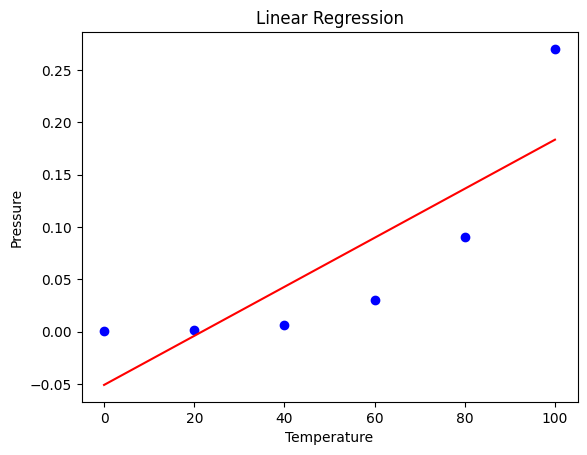

In [39]:
#Visualize the results of the linear regression model by plotting the data points and the regression line.
plt.scatter(X, y, color='blue')

plt.plot(X, lin.predict(X), color='red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()

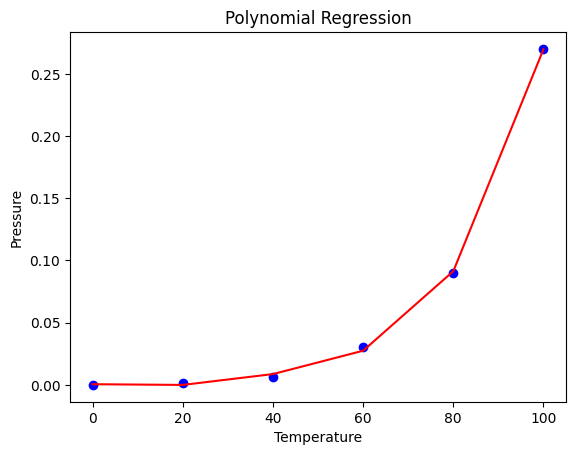

In [40]:
#Now visualize the polynomial regression results by plotting the data points and the polynomial curve.
plt.scatter(X, y, color='blue')

plt.plot(X, lin2.predict(poly.fit_transform(X)),
         color='red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()

To predict new values using both linear and polynomial regression we need to ensure the input variable is in a 2D array format.

In [47]:
pred = 100
predarray = np.array([[pred]])
lin.predict(predarray)

array([0.18333333])

In [48]:
pred2 = 100
pred2array = np.array([[pred2]])
lin2.predict(poly.fit_transform(pred2array))

array([0.26973889])